In [1]:
# importing some important libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading winequality csv file
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [21]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
x = df.drop(columns=['quality'])

In [5]:
y = df.quality

In [10]:
# train and test split
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

### BaggingClassifier with DecisionTreeClassifier

In [11]:
# Creating a bagging classifier object 100 decision trees as base estimators
bag_dt = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100)

In [13]:
# Training the data
bag_dt.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [17]:
bag_dt.base_estimator_  # showing base estimator

DecisionTreeClassifier()

In [20]:
bag_dt.classes_  # showing classes or label values

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [41]:
# Numbers of features used
bag_dt.n_features_in_

11

In [42]:
# we can check parameters which are used to train decision trees
bag_dt.get_params() 

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
# accuracy score
bag_dt.score(x_test,y_test)

0.69375

In [44]:
# making prediction
bag_dt.predict(x_test)

array([5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 4, 5, 5, 5, 6, 6, 5, 5, 5, 7,
       5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5,
       7, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 6, 5, 7, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 7, 6, 5, 5, 7, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 7, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 6, 7, 4, 5, 5, 6, 5, 5, 5, 6,
       6, 6, 5, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 7, 7, 5, 6, 6, 7,
       5, 6, 5, 5, 7, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 7, 5, 6,
       7, 6, 7, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 6,
       5, 5, 7, 5, 6, 7, 5, 8, 6, 6, 5, 6, 6, 7, 5, 6, 7, 5, 6, 5, 5, 5,
       7, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 6,
       6, 5, 5, 7, 6, 5, 6, 7, 7, 6, 5, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 7, 5, 6, 6, 7, 7, 7, 6, 5, 7, 5, 5,

In [46]:
# prediction probabilites of each class for each data row in the x_test
bag_dt.predict_proba(x_test)

array([[0.  , 0.01, 0.46, 0.32, 0.2 , 0.01],
       [0.  , 0.06, 0.91, 0.03, 0.  , 0.  ],
       [0.  , 0.04, 0.85, 0.11, 0.  , 0.  ],
       ...,
       [0.  , 0.04, 0.71, 0.25, 0.  , 0.  ],
       [0.2 , 0.05, 0.69, 0.04, 0.02, 0.  ],
       [0.  , 0.01, 0.22, 0.56, 0.2 , 0.01]])

### BaggingClassifier using KNeighborsClassifier

In [49]:
# importing knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# creating bagging object with knn classifier as base estimator
bag_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(6),n_estimators=100)

In [52]:
# Training the model
bag_knn.fit(X_train,Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),
                  n_estimators=100)

In [53]:
# showing base estimator name
bag_knn.base_estimator_

KNeighborsClassifier(n_neighbors=6)

In [55]:
# classes or label in which classification has to be done
bag_knn.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [56]:
# Numbers of features on which model is trained
bag_knn.n_features_in_

11

In [59]:
# shows all the parameters availabe which we can play to influence the quality of model
bag_knn.get_params()

{'base_estimator__algorithm': 'auto',
 'base_estimator__leaf_size': 30,
 'base_estimator__metric': 'minkowski',
 'base_estimator__metric_params': None,
 'base_estimator__n_jobs': None,
 'base_estimator__n_neighbors': 6,
 'base_estimator__p': 2,
 'base_estimator__weights': 'uniform',
 'base_estimator': KNeighborsClassifier(n_neighbors=6),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
# shows accuracy of the model
bag_knn.score(x_test,y_test)

0.5

In [63]:
# prediction on x_test dataset
bag_knn.predict(x_test)

array([6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 7,
       5, 6, 7, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5,
       7, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 6, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 7, 5, 6, 5, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 7, 6, 5, 5, 7, 4, 6, 6, 6, 5, 7, 6,
       5, 6, 7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 7, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 4, 6, 5, 6, 6, 5, 6, 6,
       6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 7, 5, 7, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 7, 5, 5, 7, 7, 7, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 7, 5, 5,
       6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 7, 5, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 7, 5, 6, 7, 6, 5, 5, 7, 6, 6, 5, 8, 5, 6, 5, 5, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 7, 6, 4, 7, 6, 7, 6, 5, 7, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5,
       5, 6, 6, 6, 5, 6, 5, 7, 6, 6, 5, 5, 6, 6, 5,

In [65]:
# prediction probabilites of each class for each data row in the x_test
bag_knn.predict_proba(x_test)

array([[0.        , 0.15833333, 0.055     , 0.50666667, 0.10166667,
        0.17833333],
       [0.        , 0.00166667, 0.97833333, 0.02      , 0.        ,
        0.        ],
       [0.        , 0.195     , 0.775     , 0.03      , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.805     , 0.00166667, 0.12333333,
        0.07      ],
       [0.        , 0.24666667, 0.40166667, 0.19666667, 0.00333333,
        0.15166667],
       [0.        , 0.        , 0.07166667, 0.76333333, 0.165     ,
        0.        ]])

### RandomForestClassifier

In [68]:
# importing random forest
from sklearn.ensemble import RandomForestClassifier

In [91]:
# creating random forest classifier object
rf = RandomForestClassifier(100)

In [120]:
# training model
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [93]:
# base estimator is shown as decision tree classifer
rf.base_estimator_

DecisionTreeClassifier()

In [94]:
# classes
rf.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [95]:
# features 
rf.n_features_

11

In [96]:
# show all parameter used to create base estimator
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [122]:
# accuracy
rf.score(x_test,y_test)

0.6875

In [123]:
# prediction on x_test
rf.predict(x_test)

array([6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 7,
       5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 7, 5,
       7, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 6, 5, 7, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 7, 6, 5, 5, 7, 4, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 7, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6,
       6, 6, 5, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 7, 6, 5, 6, 6, 7,
       6, 6, 5, 5, 7, 7, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 7, 5, 6,
       7, 6, 7, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6,
       6, 5, 7, 5, 6, 6, 5, 7, 6, 6, 5, 6, 6, 7, 5, 5, 7, 5, 6, 5, 5, 7,
       7, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 5,
       6, 5, 5, 7, 6, 5, 6, 7, 7, 6, 5, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 7, 5, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5,

In [124]:
## prediction probabilites of each class for each data row in the x_test
rf.predict_proba(x_test)

array([[0.  , 0.01, 0.35, 0.42, 0.2 , 0.02],
       [0.  , 0.03, 0.91, 0.06, 0.  , 0.  ],
       [0.  , 0.03, 0.9 , 0.07, 0.  , 0.  ],
       ...,
       [0.  , 0.03, 0.72, 0.24, 0.01, 0.  ],
       [0.12, 0.13, 0.69, 0.06, 0.  , 0.  ],
       [0.01, 0.01, 0.24, 0.58, 0.15, 0.01]])

### comparision between above created models

In [100]:
# accuracy of bagging with 100 decision trees 
bag_dt.score(x_test,y_test)

0.69375

In [101]:
# accuracy of bagging with 100 knn 
bag_knn.score(x_test,y_test)

0.5

In [102]:
# accuracy of random forest where 100 decision trees is used
rf.score(x_test,y_test)

0.71875

### Observation - Random forest model gives better accuracy

## EXTRA EXPERIMENTS WITH RANDOM FOREST

In [105]:
# shows all decision trees classifiers
rf.estimators_ 

[DecisionTreeClassifier(max_features='auto', random_state=312740373),
 DecisionTreeClassifier(max_features='auto', random_state=501395558),
 DecisionTreeClassifier(max_features='auto', random_state=557653086),
 DecisionTreeClassifier(max_features='auto', random_state=540797481),
 DecisionTreeClassifier(max_features='auto', random_state=1511964624),
 DecisionTreeClassifier(max_features='auto', random_state=1504556210),
 DecisionTreeClassifier(max_features='auto', random_state=265342615),
 DecisionTreeClassifier(max_features='auto', random_state=2107936750),
 DecisionTreeClassifier(max_features='auto', random_state=912578988),
 DecisionTreeClassifier(max_features='auto', random_state=1667734836),
 DecisionTreeClassifier(max_features='auto', random_state=529365236),
 DecisionTreeClassifier(max_features='auto', random_state=1627003457),
 DecisionTreeClassifier(max_features='auto', random_state=542956394),
 DecisionTreeClassifier(max_features='auto', random_state=301313637),
 DecisionTreeCl

In [106]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=312740373)

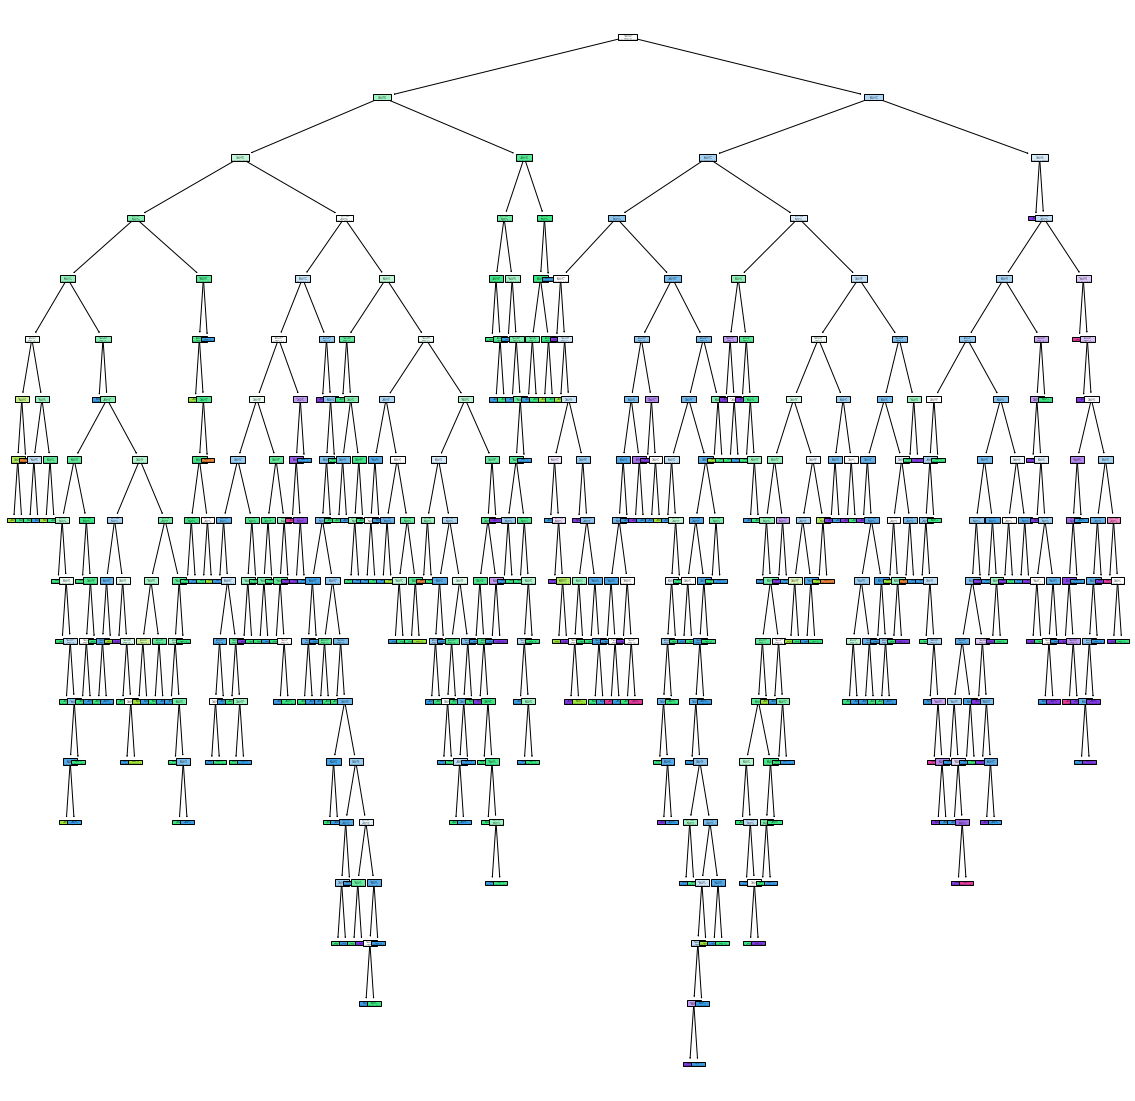

In [108]:
#Plotting tree structure of one and first decision tree
plt.figure(figsize=(20,20))
tp = tree.plot_tree(rf.estimators_[0],filled=True)

### GRID SEARCH

In [109]:
# setting some parameter which we want to tune for randome forest
grid_param = {
    "n_estimators":[100,150,200],
    "criterion" : ["gini","random"],
    "max_depth" : range(5,10),
    "min_samples_leaf" : range(5)
}

In [110]:
rf = RandomForestClassifier()

In [111]:
# gridsearchcv for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf,param_grid=grid_param,cv=10,n_jobs=6,verbose=1)

In [112]:
# training 
grid_search_rf.fit(X_train,Y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


C:\Users\aniyant\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   15.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   37.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 1500 out of 1500 | elapsed:  2.7min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'random'],
                         'max_depth': range(5, 10),
                         'min_samples_leaf': range(0, 5),
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [113]:
# best parameter we got from grid search
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [114]:
# new random forest model
rf_new = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=9,min_samples_leaf=1,)

In [116]:
rf_new.fit(X_train,Y_train)

RandomForestClassifier(max_depth=9, n_estimators=200)

In [118]:
# accuracy of this model
rf_new.score(x_test,y_test)

0.696875

In [125]:
# accuracy of the previous model
rf.score(x_test,y_test)

0.6875

### GridSearchCV may or may not be able to increase the accuracy of the model, it's just a matter of experiment